# Stage E Graded Quiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.shape

(92016, 5)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tmax,92016.0,231.696688,4562.128748,9.9000,17.30000,21.900000,27.600000,99999.9000
SysLoad,92016.0,797.623357,613.520156,-1596.8101,417.11980,856.467925,1221.293675,3264.1663
GasPrice,92016.0,6.016163,2.608116,0.0000,3.93690,5.165600,8.023300,29.9900
ElecPrice,92016.0,65.798356,213.144084,-924.8200,31.54375,48.715000,76.495000,14700.0000


In [7]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
# Convert the FullDate column to DateTime object

In [9]:
df['FullDate']= pd.to_datetime(df['FullDate'])

In [10]:
df.set_index('FullDate', inplace = True) 

In [11]:
#resample, from hourly to daily

In [12]:
df_daily_rate = df.resample('D').sum()

In [13]:
df_daily_rate.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [14]:
df_daily_rate.shape

(3834, 4)

In [15]:
#Q11 Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

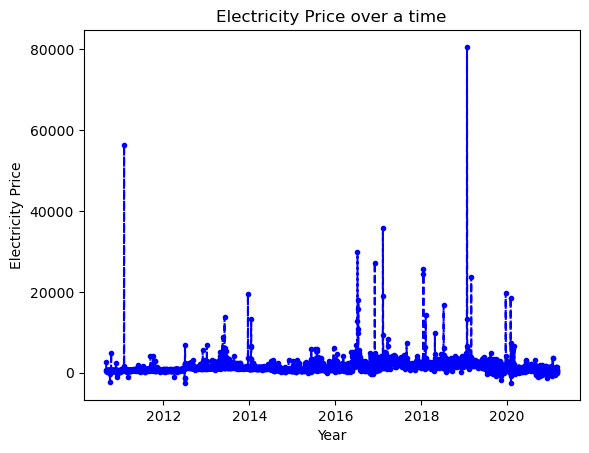

In [16]:
plt.plot(df_daily_rate.index, df_daily_rate.ElecPrice, '--', marker='.',color='blue')
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time')
plt.show()

In [17]:
#Q12  Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [18]:
pvs = adfuller(df_daily_rate['SysLoad']) 
pvg = adfuller(df_daily_rate['GasPrice']) 
round(pvs[1], 6), round(pvg[1], 6)

(0.004254, 0.045027)

In [19]:
#Q13 Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [20]:
cv_elecprice = adfuller(df_daily_rate['ElecPrice'])
round(pvg[4]['10%'], 4), round(cv_elecprice[4]['5%'], 4)

(-2.5672, -2.8623)

In [21]:
 train_data = df_daily_rate.iloc[:2757,:]
test_data = df_daily_rate.iloc[2757:,:]
train_data.shape , test_data.shape

((2757, 4), (1077, 4))

In [22]:
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [23]:
df_train = train_data.iloc[:,[0,-1]]
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [24]:
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [25]:
df_test = test_data.iloc[:,[0,-1]]
df_test = df_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [26]:
# Model Implementation

In [27]:
model = Prophet()
model.fit(df_train)
forecast_result = model.predict(df_test) 
forecast_result.head()

22:28:54 - cmdstanpy - INFO - Chain [1] start processing
22:28:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.799430,212.941734,4837.765748,2684.799430,2684.799430,-155.229589,-155.229589,-155.229589,9.738301,9.738301,9.738301,-164.967890,-164.967890,-164.967890,0.0,0.0,0.0,2529.569840
1,2018-03-21,2685.595004,295.668156,5054.561936,2685.595004,2685.595004,-2.715794,-2.715794,-2.715794,159.361120,159.361120,159.361120,-162.076914,-162.076914,-162.076914,0.0,0.0,0.0,2682.879210
2,2018-03-22,2686.390579,565.794690,5132.671924,2686.390579,2686.390579,95.496503,95.496503,95.496503,257.118925,257.118925,257.118925,-161.622421,-161.622421,-161.622421,0.0,0.0,0.0,2781.887082
3,2018-03-23,2687.186153,221.676296,4943.866772,2687.186153,2687.186153,-113.162769,-113.162769,-113.162769,50.275969,50.275969,50.275969,-163.438738,-163.438738,-163.438738,0.0,0.0,0.0,2574.023384
4,2018-03-24,2687.981728,-44.027827,4709.690727,2687.981728,2687.981728,-438.737441,-438.737441,-438.737441,-271.453689,-271.453689,-271.453689,-167.283752,-167.283752,-167.283752,0.0,0.0,0.0,2249.244287


In [28]:
#MAPE function

In [29]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [30]:
#q14 Evaluating the results of your time series model on the test set, what is the MAPE

In [31]:
MAPE = Metric(df_test['y'],forecast_result['yhat'])
round(MAPE,2)

544.95

In [32]:
#q15 What is the RMSE in 2 decimal places?

In [33]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(df_test['y'],forecast_result['yhat']))
round(RMSE,2)

3208.69

In [34]:
#q16 plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

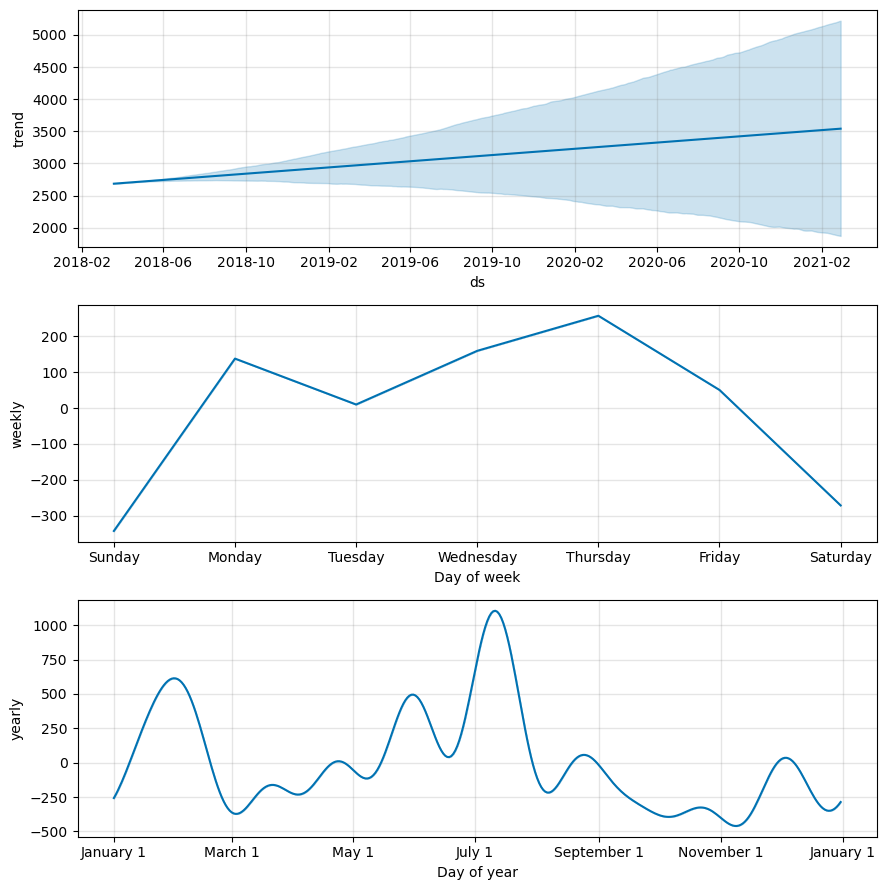

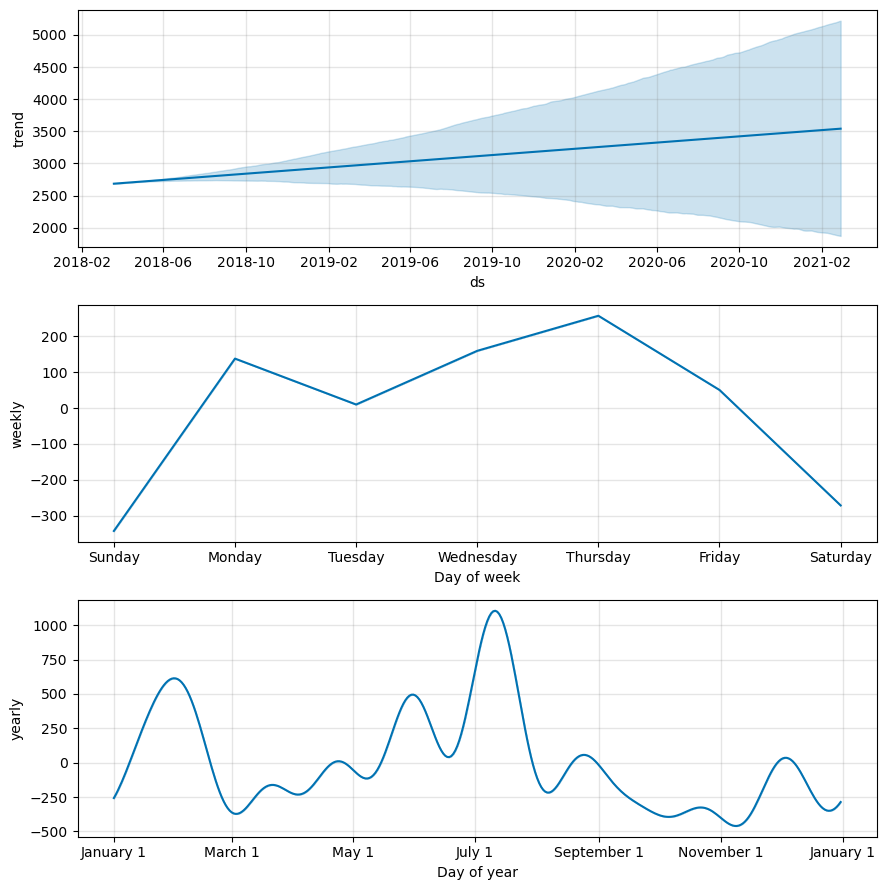

In [35]:
model.plot_components(forecast_result)

In [36]:
#for questions 17 to 19, we consider the Multivariate Time Series Model

In [37]:
df_daily_rate.reset_index(inplace=True)

In [38]:
dsr = df_daily_rate.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})

In [39]:
train_dsr = dsr.iloc[:2757,:]
test_dsr = dsr.iloc[2757:,:]

In [40]:
# Model implementation

In [41]:
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2 = model2.fit(train_dsr)

22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:56 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
forecast_new_result = model2.predict(test_dsr)

In [43]:
#q17 Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [44]:
MAPE = Metric(test_dsr['y'],forecast_new_result['yhat'])
round(MAPE,2)

233.05

In [45]:
#q18 What is the RMSE in 2 decimal places

In [46]:
RMSE = np.sqrt(metrics.mean_squared_error(test_dsr['y'],forecast_new_result['yhat']))
round(RMSE,2)

2708.86

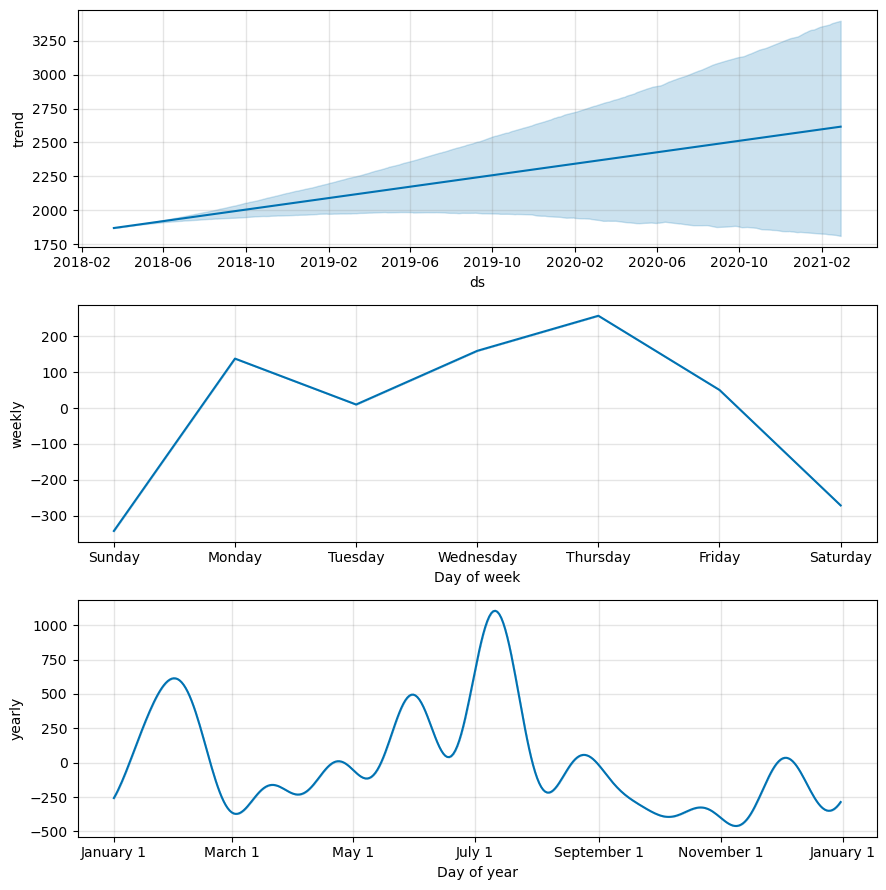

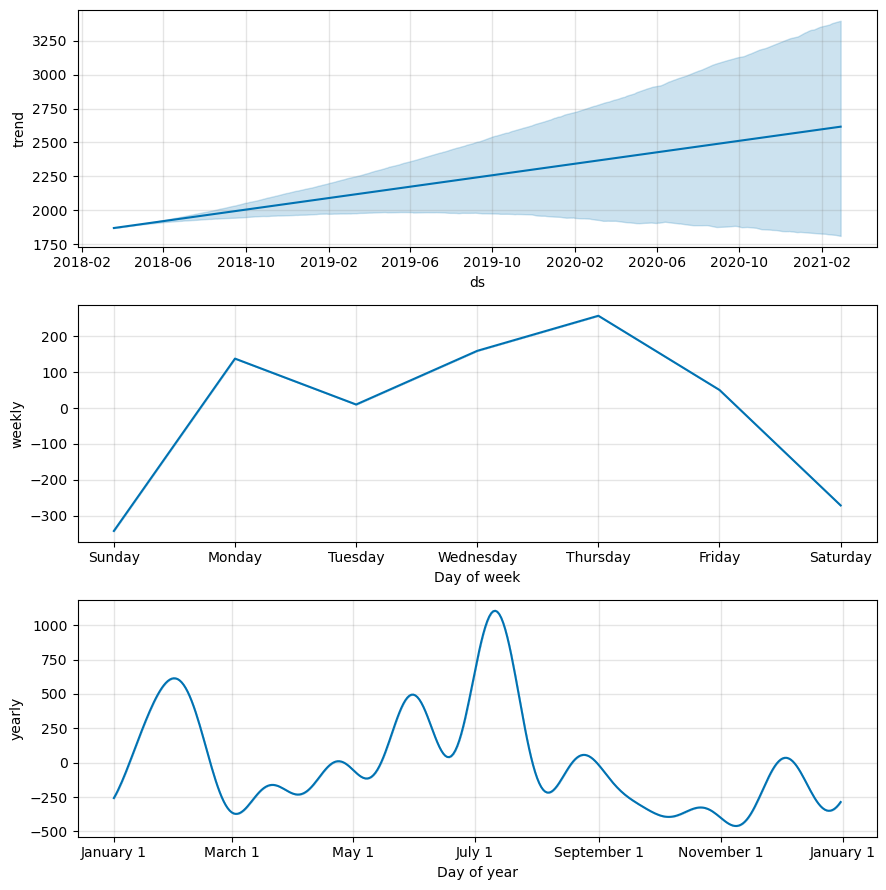

In [47]:
model.plot_components(forecast_new_result)

In [48]:
trainData = df_daily_rate.iloc[:2757,:]
testData = df_daily_rate.iloc[2757:,:]
trainData.shape , testData.shape

((2757, 5), (1077, 5))

In [49]:
train_df = trainData.iloc[:,[0,2,3,4]]
test_df = testData.iloc[:,[0,2,3,4]]

In [50]:
train_df = trainData.iloc[:,[0,2,3,4]]
test_df = testData.iloc[:,[0,2,3,4]]

train_df = train_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
test_df = test_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})

In [51]:
# Model Implementation

In [52]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model = model.fit(train_df)
forecast_values_new = model.predict(test_df)

22:28:57 - cmdstanpy - INFO - Chain [1] start processing
22:28:57 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
#Q19 If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

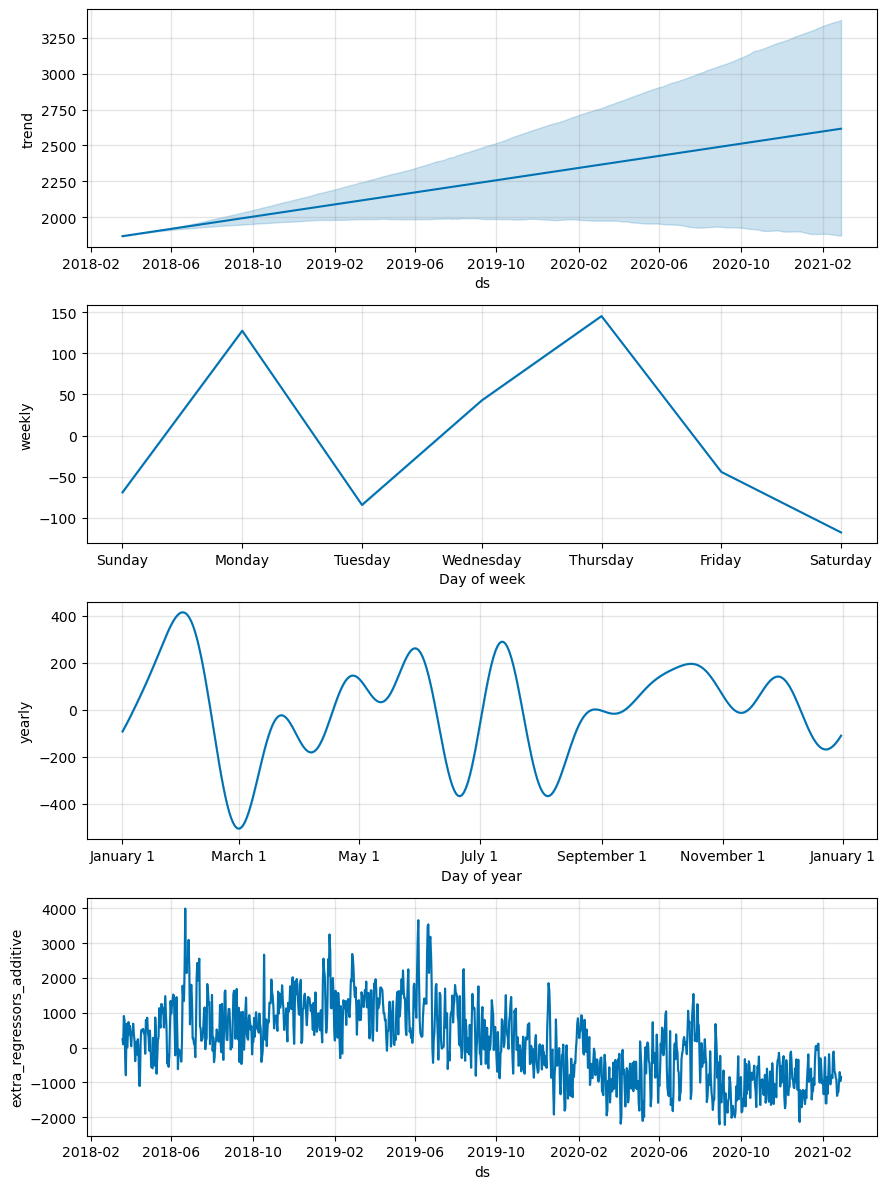

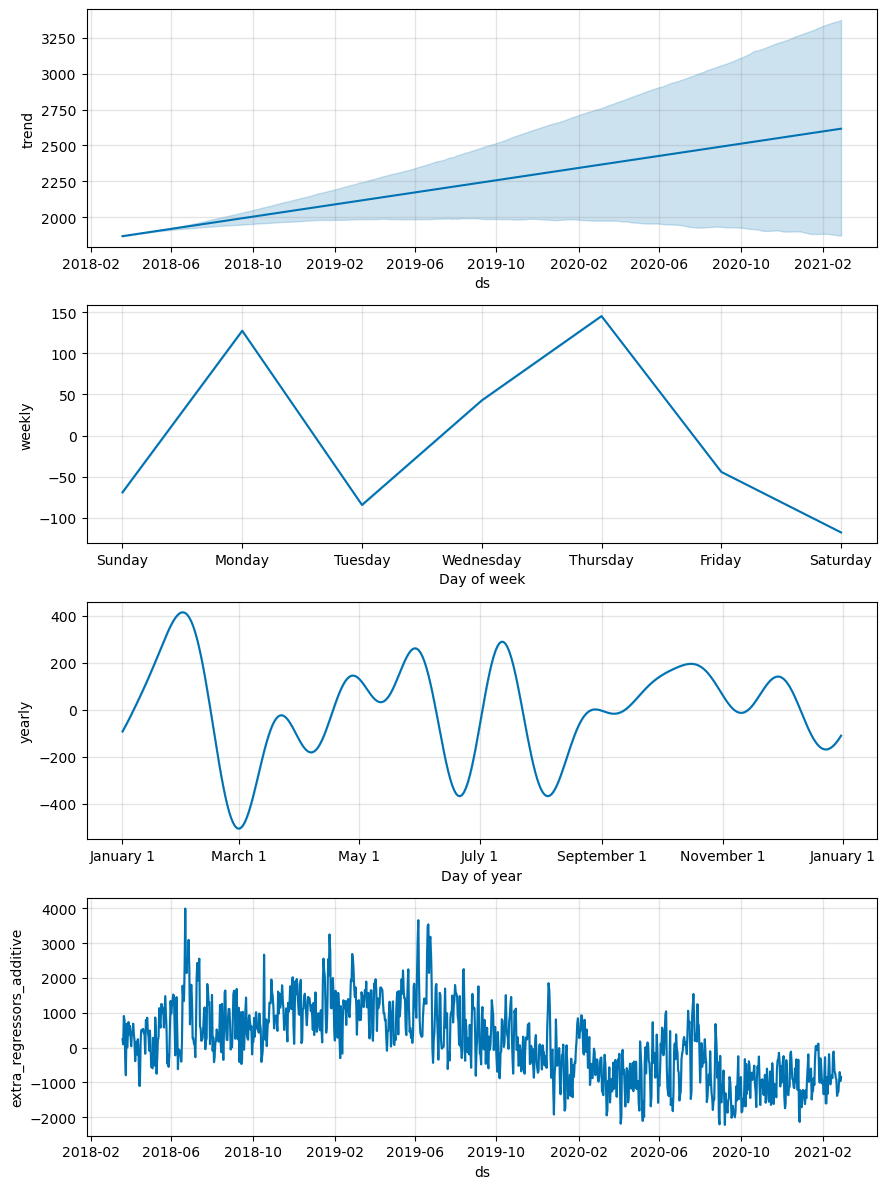

In [54]:
model.plot_components(forecast_values_new)

In [55]:
#Q20 What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [56]:
MAPE = Metric(test_df['y'],forecast_values_new['yhat'])
round(MAPE,2)

232.97